In [ ]:
# Mount your own google drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')
import sys
# Change the path below to the path where your folder locates
sys.path.append('/content/gdrive/MyDrive/cm146-winter24/pset2')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries
import os
import time

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

# just for showing some tables
import pandas as pd

In [ ]:
######################################################################
# classes
######################################################################

class Data :

    def __init__(self, X=None, y=None) :
        """
        Data class.

        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y

    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.

        Parameters
        --------------------
            filename -- string, filename
        """

        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")

        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]

    def plot(self, **kwargs) :
        """Plot data."""

        if 'color' not in kwargs :
            kwargs['color'] = 'b'

        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [ ]:
class PolynomialRegression() :

    def __init__(self, m=1) :
        """
        Ordinary least squares regression.

        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m


    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].

        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features

        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n,d = X.shape

        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        Phi = X
        m = self.m_

        Phi = np.ones((n, m+1))
        for i in range(1,m+1,1):
          Phi[:,i] = X.flatten()**(i)

        ### ========== TODO : END ========== ###

        return Phi


    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes

        Returns
        --------------------
            self    -- an instance of self
        """

        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()

        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration

        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1.0 / (1 + t)
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###

            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math

            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(X, self.coef_)
            delta  = y_pred - y
            delta  = delta.reshape(-1, 1) # tall matrix
            g      = np.sum(delta * X, axis = 0)

            self.coef_ = self.coef_ - 2 * eta * g
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
            ### ========== TODO : END ========== ###

            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break

            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec

        print('number of iterations: %d'%(t+1))
        #book keeping the number of iterations
        self.iter_ = t+1
        return self


    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution

        self.coef_ = np.dot(np.dot((np.linalg.pinv(np.dot(X.T, X))), X.T),y)
        ### ========== TODO : END ========== ###


    def predict(self, X) :
        """
        Predict output for X.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features

        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X, self.coef_)
        ### ========== TODO : END ========== ###

        return y


    def cost(self, X, y) :
        """
        Calculates the objective function.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        cost = np.sum((y - self.predict(X))**2)
        ### ========== TODO : END ========== ###
        return cost


    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        error = np.sqrt(self.cost(X, y) / X.shape[0])
        ### ========== TODO : END ========== ###
        return error


    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'

        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

Visualizing data...


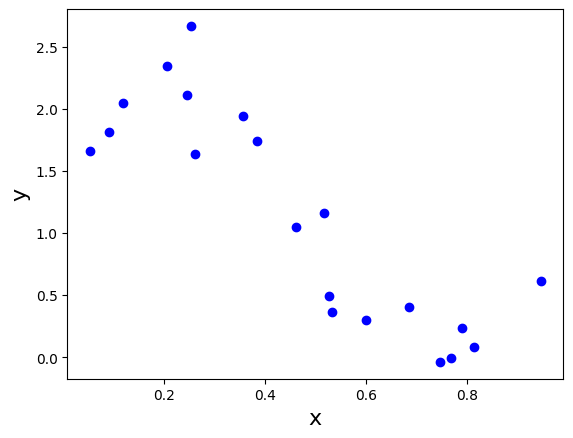

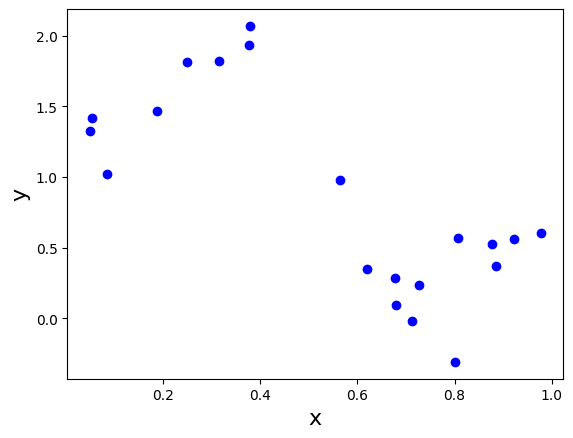

Investigating linear regression...
40.233847409671
checking convergence rate under different eta
number of iterations: 10000
number of iterations: 7021
number of iterations: 765


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-4-44466693623c>:105: RuntimeWarning: overflow encountered in power
  err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
<ipython-input-4-44466693623c>:109: RuntimeWarning: invalid value encountered in subtract
  if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
<ipython-input-4-44466693623c>:104: RuntimeWarning: invalid value encountered in subtract
  self.coef_ = self.coef_ - 2 * eta * g


number of iterations: 10000
      eta   theta_0   theta_1  iterations      cost      time
0  0.0001  2.270448 -2.460648       10000  4.086397  1.017170
1  0.0010  2.446407 -2.816353        7021  3.912576  0.499244
2  0.0100  2.446407 -2.816353         765  3.912576  0.045830
3  0.1000       NaN       NaN       10000       NaN  0.708435
model parameter by close form: [ 2.44640709 -2.81635359]
train cost close form: 3.9125764057914636
close form time: 0.0012502670288085938
number of iterations: 1357
auto step size model.coef_: [ 2.44640676 -2.81635292]
auto step size model.iter_: 1357
auto step size train cost: 3.9125764057920818
Investigating polynomial regression...
    polynomial_degree  train_cost  train_rms  test_rms
0                   0   14.691058   0.857061  0.747268
1                   1    3.912576   0.442299  0.593595
2                   2    3.895178   0.441315  0.595711
3                   3    1.193349   0.244269  0.371943
4                   4    1.055083   0.229683  0.36

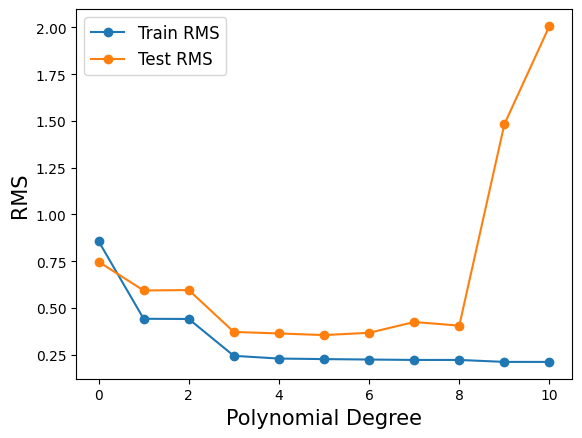

Done!


In [ ]:
######################################################################
# main
######################################################################

def main() :
    # load data
    # Use the abs path on your own Google Drive
    train_data = load_data('/content/gdrive/MyDrive/cm146-winter24/pset2/regression_train.csv')
    test_data = load_data('/content/gdrive/MyDrive/cm146-winter24/pset2/regression_test.csv')

    # print(train_data.X.shape, train_data.y.shape)
    # print(test_data.X.shape, test_data.y.shape)


    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')
    plot_data(train_data.X, train_data.y)
    plot_data(test_data.X, test_data.y)

    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')
    model = PolynomialRegression()
    model.coef_ = np.zeros(2)
    print(model.cost(train_data.X, train_data.y))

    # check convergence rate
    print(f"checking convergence rate under different eta")
    # etas = [10**-6, 10**-5, 10**-3, 0.0168]
    etas = [10**-4, 10**-3, 10**-2, 0.1]
    cov_df = []
    for eta in etas:
      model = PolynomialRegression()
      #model.fit_GD(X = train_data.X, y = train_data.y, eta = eta, eps = 10**(-5))
      start_time = time.time()
      model.fit_GD(X = train_data.X, y = train_data.y, eta = eta)
      end_time = time.time()
      cov_df = cov_df + [[eta] + list(model.coef_) + [model.iter_] +  [model.cost(train_data.X, train_data.y)] + [end_time - start_time]]

    cov_df = pd.DataFrame(cov_df,
                          columns = ["eta", "theta_0", "theta_1", "iterations", "cost", "time"])
    print(cov_df)

    model = PolynomialRegression()
    start_time = time.time()
    model.fit(X = train_data.X, y = train_data.y)
    end_time = time.time()
    print(f"model parameter by close form: {model.coef_}")
    print(f"train cost close form: {model.cost(train_data.X, train_data.y)}")
    print(f"close form time: {end_time - start_time}")

    model = PolynomialRegression()
    #model.fit_GD(X = train_data.X, y = train_data.y, eta = eta, eps = 10**(-10))
    model.fit_GD(X = train_data.X, y = train_data.y)
    print(f"auto step size model.coef_: {model.coef_}")
    print(f"auto step size model.iter_: {model.iter_}")
    print(f"auto step size train cost: {model.cost(train_data.X, train_data.y)}")

    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    # print('Investigating polynomial regression...')
    print('Investigating polynomial regression...')
    poly_df = []
    for m in range(0, 11, 1):
      model = PolynomialRegression(m)
      model.fit(X = train_data.X, y = train_data.y)
      poly_df = poly_df + [[m] +
                           [model.     cost(X = train_data.X, y = train_data.y)]+
                           [model.rms_error(X = train_data.X, y = train_data.y)] +
                           [model.rms_error(X = test_data.X,  y = test_data.y)]]
    poly_df = pd.DataFrame(poly_df, columns = ["polynomial_degree", "train_cost", "train_rms", "test_rms"])
    print(poly_df)


    plt.plot(poly_df["polynomial_degree"], poly_df["train_rms"], marker='o', label = "Train RMS")
    plt.plot(poly_df["polynomial_degree"], poly_df["test_rms"], marker='o', label = "Test RMS")
    plt.legend(prop={'size': 12})
    plt.xlabel("Polynomial Degree", fontsize=15)
    plt.ylabel("RMS", fontsize=15)
    plt.show()

    ### ========== TODO : END ========== ###




    print("Done!")

if __name__ == "__main__":
    main()
